### 下述代码流程如下
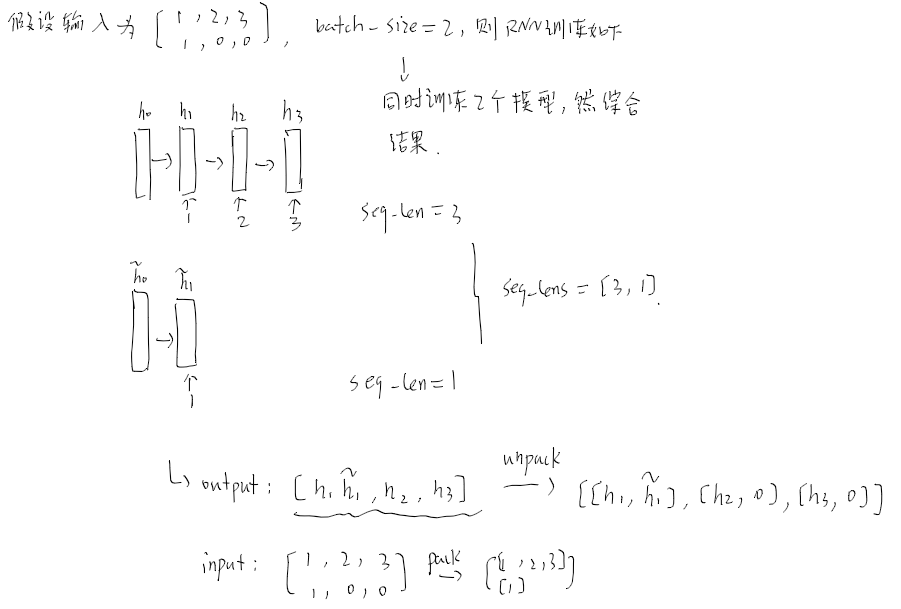

In [2]:
import torch
import torch.nn as nn
from torch.nn import utils as nn_utils

batch_size = 2
hidden_size = 2
n_layers = 1

input = torch.Tensor([[1,2,3],[1,0,0]]).T.resize(3,2,1)  # (3, 2, 1)

seq_lens = [3,1] 
packed = nn_utils.rnn.pack_padded_sequence(input, seq_lens) # batch_sizes [2, 1, 1]

rnn = nn.RNN(1, hidden_size, n_layers)  
h0 = torch.randn(n_layers, batch_size, hidden_size, requires_grad=True)  # (2,)

out,h_n = rnn(packed, h0)         

unpacked = nn_utils.rnn.pad_packed_sequence(out)

/home/heyuehui/.local/lib/python3.8/site-packages/torch/tensor.py:358: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [3]:
unpacked

(tensor([[[ 0.5027, -0.5056],
          [ 0.3847, -0.6863]],
 
         [[ 0.3165, -0.7243],
          [ 0.0000,  0.0000]],
 
         [[-0.0627, -0.8280],
          [ 0.0000,  0.0000]]], grad_fn=<CopySlices>),
 tensor([3, 1]))

In [4]:
list(rnn.parameters())

[Parameter containing:
 tensor([[-0.4138],
         [-0.2220]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1131, -0.2024],
         [ 0.2615, -0.0261]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6464, -0.0387], requires_grad=True),
 Parameter containing:
 tensor([ 0.3497, -0.5785], requires_grad=True)]

In [5]:
input

tensor([[[1.],
         [1.]],

        [[2.],
         [0.]],

        [[3.],
         [0.]]])

### 所以，RNN in torch可以抽象化为这样一个block
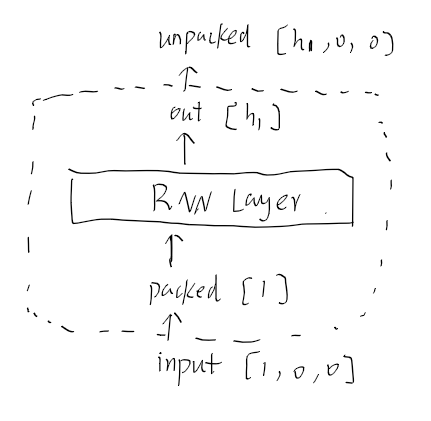